# Vehicle Price Prediction Using Regression Models

**Rachel Kim**


## **1. Library import**

In [ ]:
#loading the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# for reloading the module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **2. Data preparation**

In [ ]:
# loading the dataset
df = pd.read_csv('dataset/Lab2_prepared_RKi050.csv')

In [ ]:
# a peek of dataset by head()
print(df.head())

# data information display
print(df.info())

     year  cylinders  odometer  sqrt_price  dr_fwd  dr_rwd  ts_lien  \
0  2012.0          8   83797.0  118.300465   False    True    False   
1  2017.0          4   76119.0  104.857046    True   False    False   
2  2019.0          4   43325.0  146.625373   False   False    False   
3  2012.0          4  142000.0   80.622577    True   False    False   
4  2016.0          4  106471.0   94.863059    True   False    False   

   ts_rebuilt  ts_salvage  fl_electric  ...  mk_kia  mk_nissan  mk_toyota  \
0       False       False        False  ...   False      False      False   
1       False       False        False  ...   False      False      False   
2       False       False        False  ...   False       True      False   
3       False       False        False  ...   False      False       True   
4       False       False        False  ...   False      False      False   

   ex_black  ex_blue  ex_grey  ex_other  ex_red  ex_silver  ex_white  
0     False    False    False     False

In [ ]:
# In this part, all dummy columns value had boolean type.(Because phython automatically saved as boolean.)
# So I changed the values from boolean to int.
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)
print(df.dtypes)
print(df.shape)

year            float64
cylinders         int64
odometer        float64
sqrt_price      float64
dr_fwd            int32
dr_rwd            int32
ts_lien           int32
ts_rebuilt        int32
ts_salvage        int32
fl_electric       int32
fl_gas            int32
fl_hybrid         int32
fl_other          int32
tr_manual         int32
tr_other          int32
ty_hatchback      int32
ty_mini_van       int32
ty_pickup         int32
ty_sedan          int32
ty_suv            int32
ty_truck          int32
ty_van            int32
co_excellent      int32
co_fair           int32
co_good           int32
co_like_new       int32
co_new            int32
mk_bmw            int32
mk_chevrolet      int32
mk_dodge          int32
mk_ford           int32
mk_gmc            int32
mk_honda          int32
mk_hyundai        int32
mk_kia            int32
mk_nissan         int32
mk_toyota         int32
ex_black          int32
ex_blue           int32
ex_grey           int32
ex_other          int32
ex_red          

In [ ]:
print(df.head())

     year  cylinders  odometer  sqrt_price  dr_fwd  dr_rwd  ts_lien  \
0  2012.0          8   83797.0  118.300465       0       1        0   
1  2017.0          4   76119.0  104.857046       1       0        0   
2  2019.0          4   43325.0  146.625373       0       0        0   
3  2012.0          4  142000.0   80.622577       1       0        0   
4  2016.0          4  106471.0   94.863059       1       0        0   

   ts_rebuilt  ts_salvage  fl_electric  ...  mk_kia  mk_nissan  mk_toyota  \
0           0           0            0  ...       0          0          0   
1           0           0            0  ...       0          0          0   
2           0           0            0  ...       0          1          0   
3           0           0            0  ...       0          0          1   
4           0           0            0  ...       0          0          0   

   ex_black  ex_blue  ex_grey  ex_other  ex_red  ex_silver  ex_white  
0         0        0        0         0

In [ ]:
# removing null values, but there are no null values.
df = df.dropna()

## **3. Exploratory Data Analysis**

### 3-a. Summary of the dataset

In [ ]:
# display the summary of the dataset
df.describe()

,year,cylinders,odometer,sqrt_price,dr_fwd,dr_rwd,ts_lien,ts_rebuilt,ts_salvage,fl_electric,...,mk_kia,mk_nissan,mk_toyota,ex_black,ex_blue,ex_grey,ex_other,ex_red,ex_silver,ex_white
count,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,...,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000,5521.000000
mean,2012.071002,5.490491,100371.019199,123.682324,0.409346,0.162471,0.002536,0.023003,0.009781,0.005434,...,0.025901,0.070639,0.128057,0.169535,0.093099,0.094367,0.075711,0.083137,0.131679,0.239087
std,5.716937,1.659937,62497.393735,50.982784,0.491758,0.368915,0.050297,0.149927,0.098422,0.073520,...,0.158855,0.256245,0.334183,0.375257,0.290598,0.292365,0.264559,0.276114,0.338172,0.426565
min,1990.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,46800.000000,86.596767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,5.000000,97456.000000,118.317370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.000000,142317.000000,158.110721,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,12.000000,347000.000000,299.998333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3-b. Correlation of the features

In [ ]:
# checking the correlation of the features
corr_df = df.corr()
print(corr_df)

                  year  cylinders  odometer  sqrt_price    dr_fwd    dr_rwd  \
year          1.000000  -0.228474 -0.651979    0.580179  0.086382 -0.161886   
cylinders    -0.228474   1.000000  0.213136    0.166941 -0.511664  0.236969   
odometer     -0.651979   0.213136  1.000000   -0.517404 -0.079138  0.026403   
sqrt_price    0.580179   0.166941 -0.517404    1.000000 -0.368646  0.015922   
dr_fwd        0.086382  -0.511664 -0.079138   -0.368646  1.000000 -0.366662   
dr_rwd       -0.161886   0.236969  0.026403    0.015922 -0.366662  1.000000   
ts_lien       0.018904   0.006798 -0.019480    0.022500 -0.005353 -0.002681   
ts_rebuilt    0.010353  -0.043161 -0.017169   -0.072916  0.059004 -0.021728   
ts_salvage    0.004561  -0.008301 -0.034158   -0.047435  0.037038 -0.018827   
fl_electric   0.050803  -0.066376 -0.073443    0.040433  0.008617  0.060954   
fl_gas       -0.080640  -0.075430  0.024087   -0.297881  0.117222  0.003665   
fl_hybrid    -0.002842  -0.097098  0.017438   -0.054

### 3-c. Plot the heatmap of the correlation

There are more than 40 features, I selected the first 10 columns that have the highest correlation with 'sqrt_price' column.

In [ ]:
# create a dataframe to plot the heatmap with top 10
ind_heatmap = corr_df['sqrt_price'].abs().sort_values(ascending=False)[:10].index
df_heatmap = df[ind_heatmap]

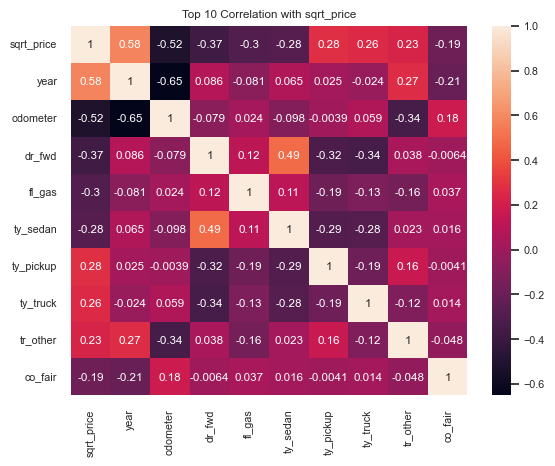

In [ ]:
# heatmap plot
plt.figure()
sns.set(font_scale=0.7)
sns.heatmap(df_heatmap.corr(), annot=True)
plt.title('Top 10 Correlation with sqrt_price')
plt.show()

### 3-d. Perform multicollinearity analysis and display the VIF data

In [ ]:
# For calculating VIF data about sqrt_price, I selected numeric values and droped 'sqrt_price' column.
df_calculate_vif = df.select_dtypes(include=np.number).drop('sqrt_price', axis=1)

# calcuating VIF
df_vif = pd.DataFrame()
df_vif['Feature'] = df_calculate_vif.columns
df_vif['VIF'] = [
    variance_inflation_factor(df_calculate_vif.values, i)
    for i in range(len(df_calculate_vif.columns))
]

print(df_vif.sort_values('VIF', ascending = False))

         Feature         VIF
0           year  113.461800
1      cylinders   20.676533
17      ty_sedan   17.823001
9         fl_gas   17.605537
18        ty_suv   14.531252
16     ty_pickup   10.428699
19      ty_truck    9.901337
2       odometer    4.888280
29       mk_ford    4.825936
3         dr_fwd    4.692606
14  ty_hatchback    4.056641
27  mk_chevrolet    3.740114
42      ex_white    3.271546
20        ty_van    3.261171
35     mk_toyota    2.890397
36      ex_black    2.560098
23       co_good    2.556851
15   ty_mini_van    2.475636
31      mk_honda    2.253495
41     ex_silver    2.217751
11      fl_other    2.208737
21  co_excellent    2.091670
34     mk_nissan    1.993641
30        mk_gmc    1.934238
38       ex_grey    1.884706
37       ex_blue    1.863866
13      tr_other    1.863388
4         dr_rwd    1.829655
40        ex_red    1.782609
39      ex_other    1.718908
26        mk_bmw    1.635027
28      mk_dodge    1.588631
32    mk_hyundai    1.516823
10     fl_hybr

<font color="red">**Scaling**: Some columns have high VIF value. I want to figure out availability to scale it.</font>

In [ ]:
# scaling
sc_df = StandardScaler()
scaled_features = sc_df.fit_transform(df_calculate_vif)

# VIF after scaling
df_vif_scaled = pd.DataFrame()
df_vif_scaled['Feature'] = df_calculate_vif.columns
df_vif_scaled['VIF'] = [
    variance_inflation_factor(scaled_features, i)
    for i in range(len(df_calculate_vif.columns))
]

print(df_vif_scaled.sort_values('VIF', ascending=False))

         Feature        VIF
17      ty_sedan  12.543710
18        ty_suv  11.177511
16     ty_pickup   8.855169
19      ty_truck   8.525398
14  ty_hatchback   3.880624
29       mk_ford   3.624355
20        ty_van   3.176046
27  mk_chevrolet   3.062287
3         dr_fwd   2.773834
35     mk_toyota   2.520447
42      ex_white   2.491499
9         fl_gas   2.467622
15   ty_mini_van   2.432122
36      ex_black   2.128175
0           year   2.111849
11      fl_other   2.087558
31      mk_honda   2.058551
2       odometer   2.050235
41     ex_silver   1.926650
34     mk_nissan   1.857552
23       co_good   1.845698
30        mk_gmc   1.826653
1      cylinders   1.758923
38       ex_grey   1.706954
37       ex_blue   1.692286
13      tr_other   1.686310
40        ex_red   1.637706
39      ex_other   1.602295
26        mk_bmw   1.568084
4         dr_rwd   1.554635
28      mk_dodge   1.528304
21  co_excellent   1.469728
32    mk_hyundai   1.464962
10     fl_hybrid   1.403444
33        mk_kia   1

### 3-e. Univariate Analysis

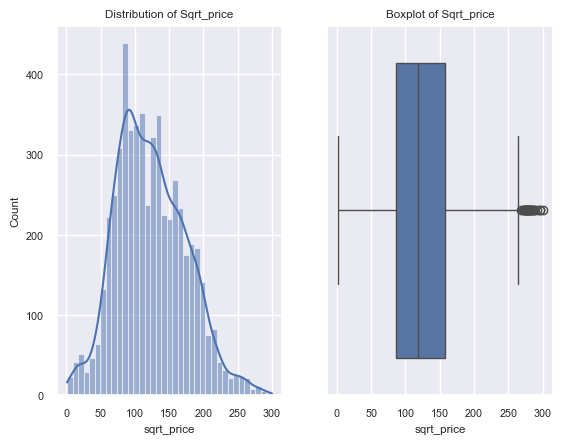

count    5521.000000
mean      123.682324
std        50.982784
min         1.000000
25%        86.596767
50%       118.317370
75%       158.110721
max       299.998333
Name: sqrt_price, dtype: float64

In [ ]:
# distribution plot
plt.figure
plt.subplot(1,2,1)
sns.histplot(df['sqrt_price'], kde=True)
plt.title('Distribution of Sqrt_price')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['sqrt_price'])
plt.title('Boxplot of Sqrt_price')

plt.show()

# for checking the detail values of boxplot, I used describe()
df['sqrt_price'].describe()

### <font color = "blue">observation</font>
**Distribution**: The frequency of values between 50 and 100 is high, and the tail of the graph stretches long to the right, indicating that some values are extremely high.

**Box plot**: The median is 123, Q1 is 86, and Q3 is 158, with most values distributed between 80 and 160. Several outliers are observed on the right, revealing that some data points with sqrt_price values above 250 exist.

### 3-f. Multivariate Analysis

Text(0.5, 1.0, 'odometer vs Sqrt_price')

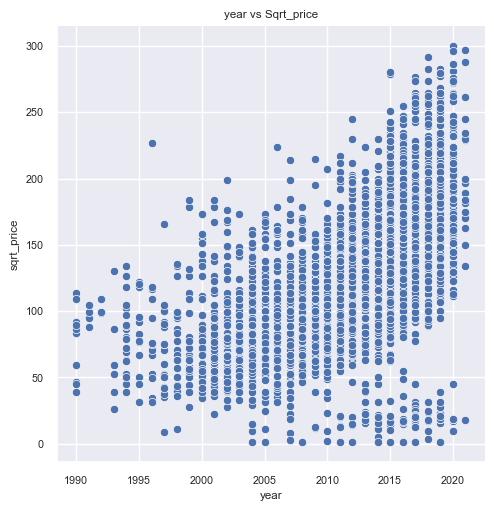

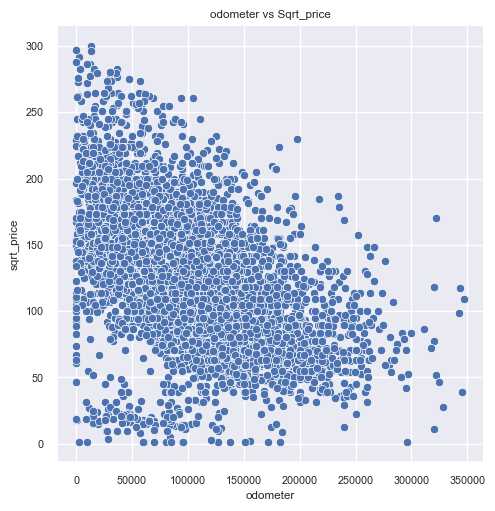

In [ ]:
# making 2 scatter plots to compare sqrt_price

# year vs sqrt_price
sns.relplot(data = df, x="year", y="sqrt_price")
plt.title('year vs Sqrt_price')

# odometer vs sqrt_price
sns.relplot(data = df, x="odometer", y="sqrt_price")
plt.title('odometer vs Sqrt_price')

### 3-g. Feature observation and Hypothesis

### <font color = "blue">Observation</font>

**Year** : The observation shows that more recent vehicle years are generally associated with higher prices. This is likely because newer vehicles tend to incorporate more advanced technology and may have better durability, leading the year variable to have a positive correlation with sqrt_price.

**Odometer** : The odometer reading indicates how much the vehicle has been used. A higher odometer reading implies greater usage, which could mean that the vehicle’s durability and the functionality of its components may have deteriorated, leading to a lower price. Therefore, the odometer variable has a negative correlation with sqrt_price.

### <font color = "blue">Hypothesis</font>

**Year** : The more recent year of vehicle, the higher its price will be.

**Odometer** : The higher the odometer reading, the lower its price will be.

## **4. Feature Selection**

### 4-a. assign the sqrt_price to a new variable 'target'

In [ ]:
target = df.sqrt_price

### 4-b. Correlation Based Selection

In [ ]:
# loading the module what I created
from Modules import Module_RKi050 as nm

# saving features
selected_feature = nm.select_correlation(df, 'sqrt_price', 10)

# new dataframe df_correlation
df_correlation = df[selected_feature].copy()
df_correlation

,year,odometer,dr_fwd,fl_gas,ty_sedan,ty_pickup,ty_truck,tr_other,co_fair,fl_other
0,2012.0,83797.0,0,1,0,0,0,0,0,0
1,2017.0,76119.0,1,1,1,0,0,0,0,0
2,2019.0,43325.0,0,1,0,0,0,0,0,0
3,2012.0,142000.0,1,1,0,0,0,0,0,0
4,2016.0,106471.0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5516,2007.0,130861.0,1,1,1,0,0,0,0,0
5517,2010.0,36839.0,0,1,0,0,0,0,0,0
5518,2005.0,167647.0,1,1,1,0,0,0,0,0
5519,2019.0,22086.0,1,1,1,0,0,0,0,0


### 4-c. Select K-Best method

In [ ]:
df_selKBest = nm.select_best(df, num=10)
df_selKBest

,year,odometer,dr_fwd,fl_gas,fl_other,tr_other,ty_pickup,ty_sedan,ty_truck,co_fair
0,2012.0,83797.0,0,1,0,0,0,0,0,0
1,2017.0,76119.0,1,1,0,0,0,1,0,0
2,2019.0,43325.0,0,1,0,0,0,0,0,0
3,2012.0,142000.0,1,1,0,0,0,0,0,0
4,2016.0,106471.0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5516,2007.0,130861.0,1,1,0,0,0,1,0,0
5517,2010.0,36839.0,0,1,0,0,0,0,0,0
5518,2005.0,167647.0,1,1,0,0,0,1,0,0
5519,2019.0,22086.0,1,1,0,0,0,1,0,0


## **5. Linear Regression Models with Feature selection, Feature trasformation and Scaling**

In [ ]:
# list for saving results
f_select_list = []
f_transform_list = []
f_scaler_list = []
r2_scores = []
rmse_scores = []
model_descriptions = []

In [ ]:
# Create a function that performs second-degree polynomial transformation
def make_poly(data):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    return poly.fit_transform(data)

### 5-a. Linear Regression with all features, no transfrom and no scaler

In [ ]:
# Setting all features and target variable
X_all = df.drop(columns=['sqrt_price']) # dropping sqrt_price
y = df['sqrt_price']

# Splitting the data 75:25, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Storing results
r2_scores.append(r2)
rmse_scores.append(rmse)
model_descriptions.append('All Features, No Transformation, No Scaler')

# Storing the model configuration in the lists
f_select_list.append("All Features")
f_transform_list.append("None")
f_scaler_list.append("None")

# print
print("R2 - All Features, No Transformation, No Scaler :", r2)
print("RMSE - All Features, No Transformation, No Scaler :", rmse)

R2 - All Features, No Transformation, No Scaler : 0.5976248923708578
RMSE - All Features, No Transformation, No Scaler : 32.99803904069242


### 5-b. Linear Regression with all features, no transfrom and MinMax scaler

In [ ]:
# Setting all features and target variable. I dropped the target variable like before.
X_all = df.drop(columns=['sqrt_price'])
y = df['sqrt_price']

# Initialize MinMax scaler
scaler = MinMaxScaler()

# Scale the feature data
X_all_scaled = scaler.fit_transform(X_all)

# Splitting the data 75:25, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.25, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)

# Calculating R2
r2 = r2_score(y_test, y_pred)
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Storing results
r2_scores.append(r2)
rmse_scores.append(rmse)

# Model description list initialization and appending the description
model_descriptions.append('All Features, No Transformation, MinMax Scaler')

# Storing the model configuration in lists
f_select_list.append("All Features")
f_transform_list.append("None")
f_scaler_list.append("MinMax")

# Print
print("R2 - All Features, No Transformation, MinMax Scaler :", r2)
print("RMSE - All Features, No Transformation, MinMax Scaler :", rmse)

R2 - All Features, No Transformation, MinMax Scaler : 0.5976248923708793
RMSE - All Features, No Transformation, MinMax Scaler : 32.99803904069153


### 5-c. Linear Regression with all features, Polynomial Degree 2 Transformation, No Scaler

In [ ]:
# Setting all features and target variable
X_all = df.drop(columns=['sqrt_price'])
y = df['sqrt_price']

# Initialize PolynomialFeatures for degree 2 without bias
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the feature data
X_all_poly = poly.fit_transform(X_all)

# Splitting the data 75:25, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_all_poly, y, test_size=0.25, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
# Calculating R2
r2 = r2_score(y_test, y_pred)
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Storing results
r2_scores.append(r2)
rmse_scores.append(rmse)

# Model description list initialization and appending the description
model_descriptions.append('All Features, Polynomial Degree 2, No Scaler')

# Storing the model configuration in lists
f_select_list.append("All Features")
f_transform_list.append("Poly Degree 2")
f_scaler_list.append("None")

# Print
print("R2 - All Features, Polynomial Degree 2, No Scaler :", r2)
print("RMSE - All Features, Polynomial Degree 2, No Scaler :", rmse)

R2 - All Features, Polynomial Degree 2, No Scaler : 0.5876231900951345
RMSE - All Features, Polynomial Degree 2, No Scaler : 33.40563229652334


### 5-d. Linear Regression with all features, Polynomial Degree 2 Transformation with MinMax Scaler

In [ ]:
# Setting all features and target variable
X_all = df.drop(columns=['sqrt_price'])
y = df['sqrt_price']

# Initialize PolynomialFeatures for degree 2 without bias
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the feature data
X_all_poly = poly.fit_transform(X_all)

# Initialize MinMax scaler
scaler = MinMaxScaler()

# Scale the transformed feature data
X_all_poly_scaled = scaler.fit_transform(X_all_poly)

# Splitting the data 75:25, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_all_poly_scaled, y, test_size=0.25, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)

# Calculating R2
r2 = r2_score(y_test, y_pred)
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Storing results
r2_scores.append(r2)
rmse_scores.append(rmse)

# Model description list initialization and appending the description
model_descriptions.append('All Features, Polynomial Degree 2, MinMax Scaler')

# Storing the model configuration in lists
f_select_list.append("All Features")
f_transform_list.append("Poly Degree 2")
f_scaler_list.append("MinMax")

# Print
print("R2 - All Features, Polynomial Degree 2, MinMax Scaler :", r2)
print("RMSE - All Features, Polynomial Degree 2, MinMax Scaler :", rmse)

R2 - All Features, Polynomial Degree 2, MinMax Scaler : 0.589725891144402
RMSE - All Features, Polynomial Degree 2, MinMax Scaler : 33.3203561290532


### 5-e. Linear Regression with Correlation based feature selection

In [ ]:
# # correlation_features is obtained from step 4.b (Top 10 correlated features)
correlation_features = selected_feature
X_corr = df[correlation_features]
y = df['sqrt_price']

# Initialize lists to store results
configurations = [
    {"transform": "None", "scaler": "None"},
    {"transform": "None", "scaler": "MinMax"},
    {"transform": "Poly Degree 2", "scaler": "None"},
    {"transform": "Poly Degree 2", "scaler": "MinMax"}
]

# I used loop through configurations for 5-a to 5-d
for config in configurations:
     # Apply transformations if necessary
    if config["transform"] == "Poly Degree 2":
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_transformed = poly.fit_transform(X_corr)
    else:
        X_transformed = X_corr

    # Apply scaling if necessary
    if config["scaler"] == "MinMax":
        scaler = MinMaxScaler()
        X_transformed = scaler.fit_transform(X_transformed)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    description = f"Correlation Based k=10, {config['transform']}, {config['scaler']}"
    model_descriptions.append(description)

    # Store model configuration
    f_select_list.append('Correlation Based k=10')
    f_transform_list.append(config["transform"])
    f_scaler_list.append(config["scaler"])

    # 출력
    print("R2 -", description, ":", r2)
    print("RMSE -", description, ":", rmse)

R2 - Correlation Based k=10, None, None : 0.5726202701767438
RMSE - Correlation Based k=10, None, None : 34.00787840826563
R2 - Correlation Based k=10, None, MinMax : 0.5726202701767493
RMSE - Correlation Based k=10, None, MinMax : 34.00787840826542
R2 - Correlation Based k=10, Poly Degree 2, None : 0.5937519126478059
RMSE - Correlation Based k=10, Poly Degree 2, None : 33.15646668057655
R2 - Correlation Based k=10, Poly Degree 2, MinMax : 0.5429198495022252
RMSE - Correlation Based k=10, Poly Degree 2, MinMax : 35.169707788548806


### 5-f. Linear Regression with SelectKBest selection

In [ ]:
# SelectKBest Feature Selection (k=10)
df_selKBest = nm.select_best(df, num=10)
y = df['sqrt_price']

configurations = [
    {"transform": "None", "scaler": "None"},
    {"transform": "None", "scaler": "MinMax"},
    {"transform": "Poly Degree 2", "scaler": "None"},
    {"transform": "Poly Degree 2", "scaler": "MinMax"}
]

# I used loop through configurations for 5-a to 5-d
for config in configurations:
    if config["transform"] == "Poly Degree 2":
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_transformed = poly.fit_transform(df_selKBest)
    else:
        X_transformed = df_selKBest

    if config["scaler"] == "MinMax":
        scaler = MinMaxScaler()
        X_transformed = scaler.fit_transform(X_transformed)

    X_train, X_test, y_train, y_test = train_test_split(
        X_transformed, y, test_size=0.25, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Conditional Addition to Prevent Redundancy
    description = f"SelectKBest k=10 + {config['transform']} + {config['scaler']}"
    if description not in model_descriptions:
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        model_descriptions.append(description)
        f_select_list.append('SelectKBest k=10')
        f_transform_list.append(config["transform"])
        f_scaler_list.append(config["scaler"])

    print("R2 -", description, ":", r2)
    print("RMSE -", description, ":", rmse)


R2 - SelectKBest k=10 + None + None : 0.5726202701767459
RMSE - SelectKBest k=10 + None + None : 34.007878408265555
R2 - SelectKBest k=10 + None + MinMax : 0.5726202701767493
RMSE - SelectKBest k=10 + None + MinMax : 34.00787840826541
R2 - SelectKBest k=10 + Poly Degree 2 + None : 0.5937517991764685
RMSE - SelectKBest k=10 + Poly Degree 2 + None : 33.15647131113172
R2 - SelectKBest k=10 + Poly Degree 2 + MinMax : 0.5940348506208283
RMSE - SelectKBest k=10 + Poly Degree 2 + MinMax : 33.144918493936274


## 6. Linear Regression Model with Lasso

In [ ]:
# Preparing data and scaling for Lasso
X = df.drop(columns=['sqrt_price'])
y = df['sqrt_price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Setting a range of alpha values
alphas = [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]
results = []

# Training and evaluating the Lasso regression model for each alpha
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)

    # Make predictions and evaluate performance
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    results.append({'alpha': alpha, 'RMSE': rmse, 'R2': r2})
    print("Alpha: ", alpha, "R2: ", r2, "RMSE: ", rmse)

# Select the optimal alpha based on RMSE
best_result = min(results, key=lambda x: x['RMSE'])

# Store the best Lasso model's results in the lists
f_select_list.append(f"Lasso Alpha = {best_result['alpha']}")
f_transform_list.append("None")
f_scaler_list.append("None")
r2_scores.append(best_result['R2'])
rmse_scores.append(best_result['RMSE'])

# print
print("\nBest Alpha:", best_result['alpha'])
print("Best RMSE:", best_result['RMSE'])
print("Best R2:", best_result['R2'])

Alpha:  0.01 R2:  0.597975919217208 RMSE:  32.98364236863063
Alpha:  0.1 R2:  0.5982218364813559 RMSE:  32.973552813964226
Alpha:  0.2 R2:  0.5950384807879756 RMSE:  33.1039225793388
Alpha:  0.3 R2:  0.5892994046489386 RMSE:  33.33767015212572
Alpha:  0.5 R2:  0.5803627867103889 RMSE:  33.69842290533478
Alpha:  0.7 R2:  0.5737985533910863 RMSE:  33.960966298920155
Alpha:  1 R2:  0.5633626894848897 RMSE:  34.374231757330726
Alpha:  2 R2:  0.5087018196128297 RMSE:  36.4623920965018
Alpha:  5 R2:  0.16732447575397724 RMSE:  47.46904326886096
Alpha:  10 R2:  -0.0035440580571117763 RMSE:  52.112367153160825

Best Alpha: 0.1
Best RMSE: 32.973552813964226
Best R2: 0.5982218364813559


## 7. Plot and summary anaysis

In [ ]:
# # dataframe for summary by using list and zip
df_results = pd.DataFrame(list(zip(
    f_select_list, f_transform_list, f_scaler_list, r2_scores, rmse_scores
)), columns=["Feature Selection", "Feature Transformation", "Feature Scaling", "R²", "RMSE"])

# Print results. k = 10 in my project.
print("Figure 1: Results from all models")
df_results

Figure 1: Results from all models


,Feature Selection,Feature Transformation,Feature Scaling,R²,RMSE
0,All Features,None,None,0.597625,32.998039
1,All Features,None,MinMax,0.597625,32.998039
2,All Features,Poly Degree 2,None,0.587623,33.405632
3,All Features,Poly Degree 2,MinMax,0.589726,33.320356
4,Correlation Based k=10,None,None,0.572620,34.007878
5,Correlation Based k=10,None,MinMax,0.572620,34.007878
6,Correlation Based k=10,Poly Degree 2,None,0.593752,33.156467
7,Correlation Based k=10,Poly Degree 2,MinMax,0.542920,35.169708
8,SelectKBest k=10,None,None,0.572620,34.007878
9,SelectKBest k=10,None,MinMax,0.572620,34.007878


The best model is "Lasso Alpha = 0.1". Because it has the lowest RMSE value above table.

In [ ]:
# Lasso alpha = 0.1
best_alpha = 0.1
model = Lasso(alpha=best_alpha, max_iter=10000)

# model training
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# coefficient print
print("Coefficients of the Best Model (Lasso Alpha = 0.1):")
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

Coefficients of the Best Model (Lasso Alpha = 0.1):
year            112.720230
cylinders        17.545430
odometer        -83.699208
dr_fwd          -21.270630
dr_rwd           -3.291088
ts_lien           0.000000
ts_rebuilt      -11.695132
ts_salvage      -13.632102
fl_electric      -0.000000
fl_gas          -36.206937
fl_hybrid       -25.350948
fl_other        -18.393921
tr_manual         0.000000
tr_other          2.165823
ty_hatchback    -20.007361
ty_mini_van      -4.639479
ty_pickup        11.125069
ty_sedan        -19.622664
ty_suv           -8.870788
ty_truck         11.561955
ty_van           -5.675697
co_excellent     -4.520730
co_fair         -17.627694
co_good          -4.377598
co_like_new      -2.242153
co_new            0.000000
mk_bmw            0.000000
mk_chevrolet     -5.366191
mk_dodge        -10.744276
mk_ford          -4.132096
mk_gmc            0.000000
mk_honda          3.070309
mk_hyundai       -9.056104
mk_kia          -10.259872
mk_nissan       -13.856887
mk_

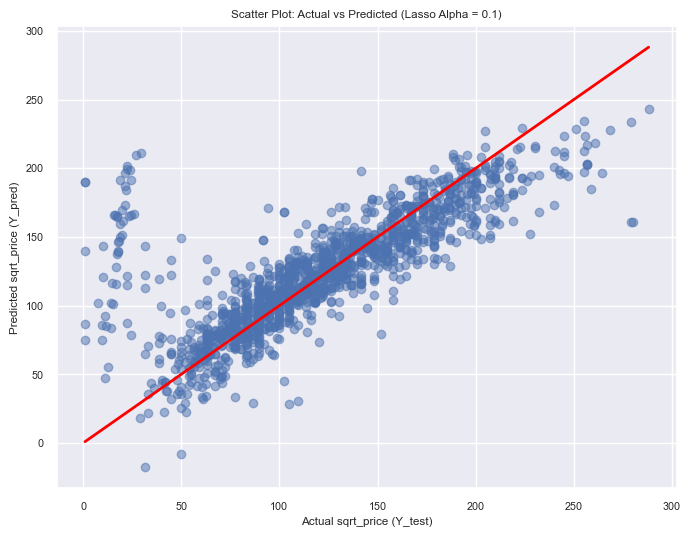

In [ ]:
# Scatter plot for comparing Y_test, Y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual sqrt_price (Y_test)")
plt.ylabel("Predicted sqrt_price (Y_pred)")
plt.title("Scatter Plot: Actual vs Predicted (Lasso Alpha = 0.1)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

### <font color = "blue">Comment</font>

The best model identified is the Lasso regression with alpha = 0.1. This model achieved the lowest RMSE(32.973553) and an R2 score(0.598222), indicating a good fit for the data. The scatter plot comparing the actual values(Y_test) and the predicted values(Y_pred) shows that the predictions align closely with the actual values, as indicated by the red line.

The reason why Lasso regression outperformed other models is that it improves the model's generalization performance by reducing the impact of multicollinearity through shrinking some coefficients to zero. Additionally, as seen in the summary table, other models using polynomial transformations also showed good performance, but the Lasso model achieved the lowest RMSE value.

## 8. Out of Sample Prediction

In [ ]:
# check the data
print(df.describe())

              year    cylinders       odometer   sqrt_price       dr_fwd  \
count  5521.000000  5521.000000    5521.000000  5521.000000  5521.000000   
mean   2012.071002     5.490491  100371.019199   123.682324     0.409346   
std       5.716937     1.659937   62497.393735    50.982784     0.491758   
min    1990.000000     3.000000       0.000000     1.000000     0.000000   
25%    2008.000000     4.000000   46800.000000    86.596767     0.000000   
50%    2013.000000     5.000000   97456.000000   118.317370     0.000000   
75%    2017.000000     6.000000  142317.000000   158.110721     1.000000   
max    2021.000000    12.000000  347000.000000   299.998333     1.000000   

            dr_rwd      ts_lien   ts_rebuilt   ts_salvage  fl_electric  ...  \
count  5521.000000  5521.000000  5521.000000  5521.000000  5521.000000  ...   
mean      0.162471     0.002536     0.023003     0.009781     0.005434  ...   
std       0.368915     0.050297     0.149927     0.098422     0.073520  ...   

In [ ]:
# Create dataframe
virtual_data = pd.DataFrame(np.zeros((2, X.shape[1])), columns=X.columns)

# value update in virtual data frame
virtual_data.loc[0, ['year', 'cylinders', 'odometer', 'dr_fwd', 'fl_gas', 'ex_black']] = [2013, 5, 97456, 1, 1, 1]
virtual_data.loc[1, ['year', 'cylinders', 'odometer', 'dr_fwd', 'fl_gas', 'ex_white']] = [2017, 6, 142317, 1, 1, 1]

# Applying MinMaxScaler
virtual_data_scaled = scaler.transform(virtual_data)

# prediction
predictions = model.predict(virtual_data_scaled)
virtual_data['predicted_sqrt_price'] = predictions

# result print
print("Predictions for Virtual Dataset:")
print(virtual_data)

Predictions for Virtual Dataset:
     year  cylinders  odometer  dr_fwd  dr_rwd  ts_lien  ts_rebuilt  \
0  2013.0        5.0   97456.0     1.0     0.0      0.0         0.0   
1  2017.0        6.0  142317.0     1.0     0.0      0.0         0.0   

   ts_salvage  fl_electric  fl_gas  ...  mk_nissan  mk_toyota  ex_black  \
0         0.0          0.0     1.0  ...        0.0        0.0       1.0   
1         0.0          0.0     1.0  ...        0.0        0.0       0.0   

   ex_blue  ex_grey  ex_other  ex_red  ex_silver  ex_white  \
0      0.0      0.0       0.0     0.0        0.0       0.0   
1      0.0      0.0       0.0     0.0        0.0       1.0   

   predicted_sqrt_price  
0            127.087335  
1            131.929701  

[2 rows x 44 columns]


### <font color = "blue">Comment</font>


The synthetic dataset was formed based on the structure of the original data, consisting of two distinct rows. MinMax scaling was applied, and the predicted sqrt_price values were generated as follows:

Row 1: Predicted sqrt_price = 127.087335

Row 2: Predicted sqrt_price = 131.929701

These results demonstrate that the model generalizes well to the synthetic data, maintaining consistency with the original data’s pattern. By using Lasso with alpha = 0.1, multicollinearity was minimized, and only relevant features were selected, ensuring the stability of the predictions.